## Pregunta 6

In [2]:
import numpy as np
import camb
import matplotlib.pyplot as plt

In [3]:
pars = camb.set_params(
    H0 = 67.5
)

In [17]:
pars.set_for_lmax(8000, lens_potential_accuracy=1)
pars.WantTensors= True
results = camb.get_transfer_functions(pars)

Text(0.5, 0, '$\\ell$')

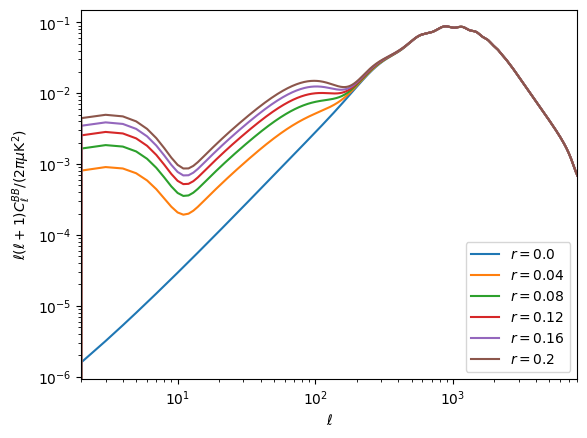

In [19]:
lmax = 8000
rs = np.linspace(0,0.2,6)

for r in rs:
    inflation_params = camb.initialpower.InitialPowerLaw()
    inflation_params.set_params(ns = 0.96, r= r)
    results.power_spectra_from_transfer(inflation_params)
    cl = results.get_total_cls(lmax, CMB_unit='muK')
    plt.loglog(np.arange(lmax+1), cl[:,2])
plt.xlim([2,lmax])
plt.legend(['$r = %s$' % r for r in rs], loc='lower right')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{BB}/ (2\pi \mu{\rm K}^2)$')
plt.xlabel(r'$\ell$')